# Uber Case Study

## 0. Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
df = pd.read_csv("https://cdn.upgrad.com/UpGrad/temp/76b3b6a4-d87d-4e82-b1c3-3f6e10b9c076/Uber%20Request%20Data.csv",
                 parse_dates=['Request timestamp', 'Drop timestamp'])

## 1. Data Exploration

In [3]:
df.shape

(6745, 6)

In [4]:
# Missing driver id means unfulfilled pickup request
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [5]:
# Not very useful in this case
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [6]:
df['Request timestamp'].describe()

count                    6745
unique                   5618
top       2016-11-07 19:02:00
freq                        6
first     2016-07-13 00:00:24
last      2016-12-07 23:54:00
Name: Request timestamp, dtype: object

In [7]:
df['Drop timestamp'].describe()

count                    2831
unique                   2598
top       2016-12-07 21:04:00
freq                        4
first     2016-07-13 00:01:12
last      2016-12-07 23:45:00
Name: Drop timestamp, dtype: object

## 2. Data cleaning and manipulation

In [8]:
# Identify duplicate rows
df.duplicated(subset=['Pickup point', 'Driver id', 'Status', 'Request timestamp', 'Drop timestamp']).sum()

221

In [9]:
# Remove duplicate rows
df.drop_duplicates(subset=['Pickup point', 'Driver id', 'Status', 'Request timestamp', 'Drop timestamp'])

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00


In [10]:
# Add derived columns
df['request_hour'] = df['Request timestamp'].dt.hour
df['drop_hour'] = df['Drop timestamp'].dt.hour
df['request_day'] = df['Request timestamp'].dt.dayofweek
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,request_hour,drop_hour,request_day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,13.0,0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,18.0,0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,9.0,2
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,22.0,2
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,9.0,2


## 3. Trends for each day

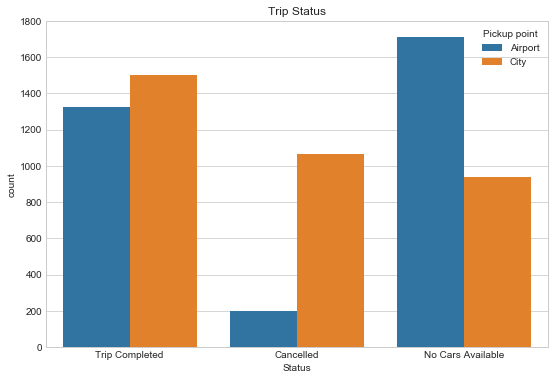

In [11]:
# Identifying the problem
plt.figure(figsize=(9, 6))
plt.title('Trip Status')
sns.countplot(x='Status', hue='Pickup point', data=df)
plt.show()

In [12]:
df_airport = df[(df['Pickup point'] == 'Airport')]
df_city = df[(df['Pickup point'] == 'City')]
airport_trips = df_airport[df_airport['Status'] != 'Trip Completed'].shape[0] * 100 / df_airport.shape[0]
city_trips = df_city[df_city['Status'] != 'Trip Completed'].shape[0] * 100 / df_city.shape[0]
print("% of incomplete Airport trips:", round(airport_trips, 2))
print("% of incomplete City trips:", round(city_trips, 2))

% of incomplete Airport trips: 59.02
% of incomplete City trips: 57.11


As clearly visible, _Cancelled Trips_ and _Non-availability of cars_ hit a lot to the business. **In more than 50% of the cases, trips were cancelled or there were no cars available to go to the airport or to the city.**

There may be some overlap in this data, but the figures will still be considerable.

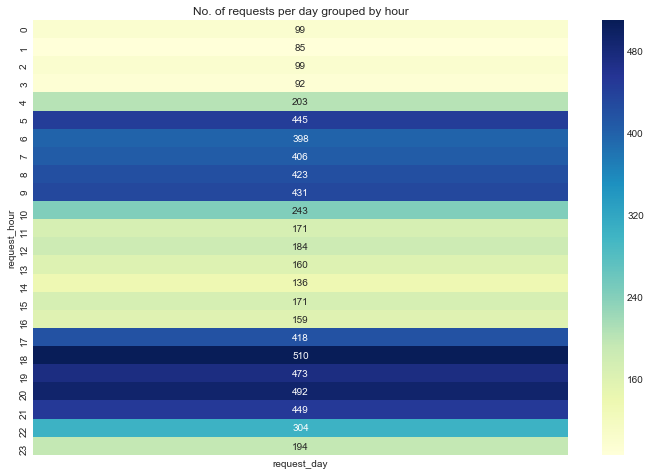

In [29]:
# Busy period for Uber driver partners
plt.figure(figsize=(12, 8))
plt.title('No. of requests per day grouped by hour')
df_1 = pd.pivot_table(df, values='request_day', index='request_hour', aggfunc='count')
sns.heatmap(df_1, cmap="YlGnBu", annot=True, fmt='d')
plt.show()

On a cursory look to the heatmap above, a day can be divided into 4 sub-groups:
* Morning - 5-11
* Afternoon - 11-17
* Evening - 17-23
* Night - 23-5

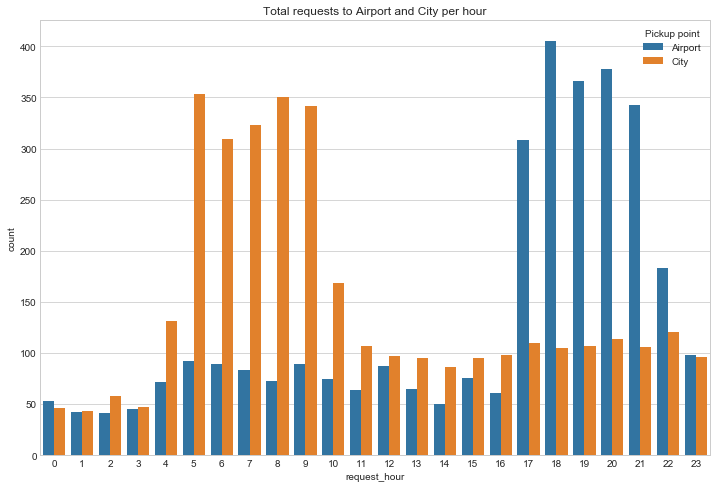

In [14]:
# Segregated request pattern per hour
plt.figure(figsize=(12, 8))
plt.title('Total requests to Airport and City per hour')
sns.countplot(x='request_hour', hue='Pickup point', data=df)
plt.show()

Mornings see more traffic from the city to the airport. This flow reverses in the evening and we get more traffic from the airport towards the city.

## 4. Intermediate step - binning time into 4 categories
##### Creating list of categories to be mapped with request hour. This will be merged into the original dataframe df.

In [15]:
# Initialize hours starting from Morning 5
df_categories = pd.DataFrame(data={'request_hour':list(range(5,29))})
df_categories['category'] = pd.cut(df_categories['request_hour'], 4, 
                                   labels=['Morning', 'Afternoon', 'Evening', 'Night'])
# Reset to hours of the day
df_categories['request_hour'] = df_categories['request_hour'] % 24
df_categories

,request_hour,category
0,5,Morning
1,6,Morning
2,7,Morning
3,8,Morning
4,9,Morning
5,10,Morning
6,11,Afternoon
7,12,Afternoon
8,13,Afternoon
9,14,Afternoon


In [16]:
df = df.merge(df_categories, how='inner', on='request_hour')

## 5. Combining data for all days

count    2831.000000
mean       52.413753
std        13.850693
min        20.783333
25%        41.000000
50%        52.083333
75%        64.000000
max        83.000000
Name: Trip time, dtype: float64


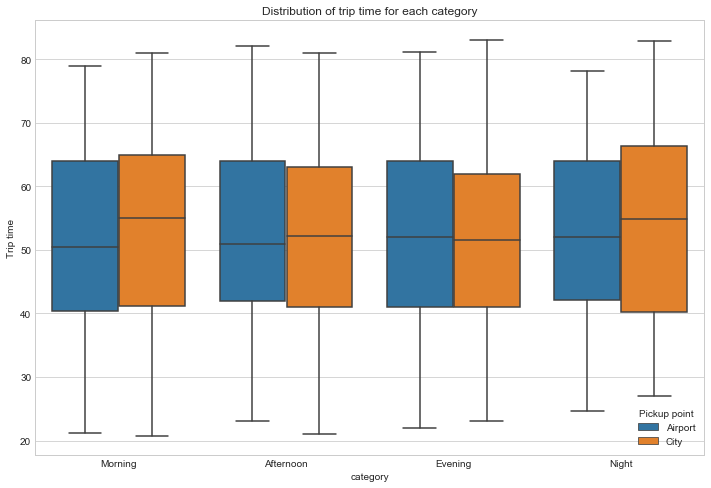

In [17]:
df_trip = df
df_trip.dropna()
df_trip['Trip time'] = (df_trip['Drop timestamp'] - df_trip['Request timestamp']).dt.seconds / 60.0
print(df_trip['Trip time'].describe())
plt.figure(figsize=(12, 8))
plt.title('Distribution of trip time for each category')
sns.boxplot(x="category", y="Trip time", hue="Pickup point", data=df_trip)
plt.show()

## 6. Problem Identification

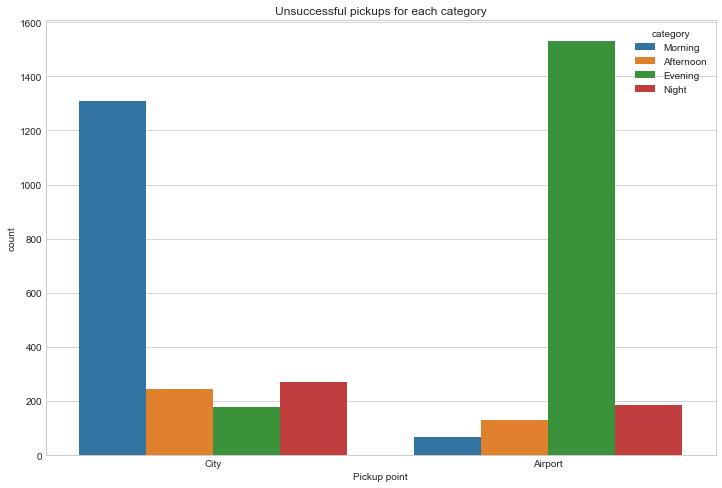

In [18]:
df_canceled = df
df_canceled = df_canceled[df_canceled['Drop timestamp'].isnull()]
plt.figure(figsize=(12, 8))
plt.title('Unsuccessful pickups for each category')
sns.countplot(x='Pickup point', hue='category', data=df_canceled)
plt.show()

Very few Airport pickups are cancelled, the problem is availability of cars, especially in the evening. City pickups are more problematic in the morning.

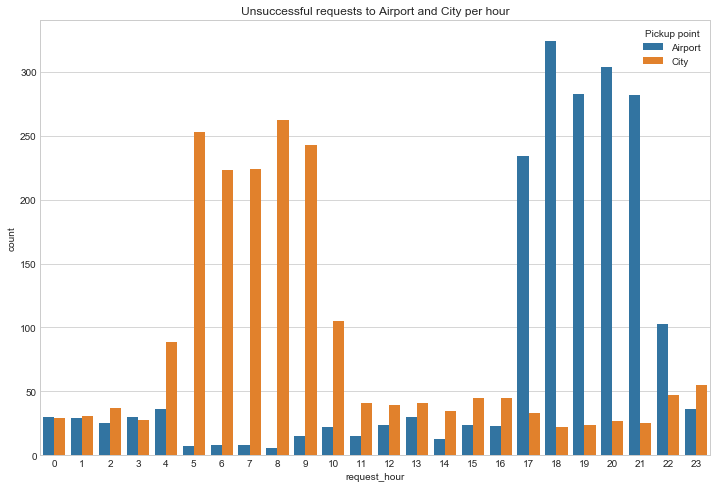

In [19]:
plt.figure(figsize=(12, 8))
plt.title('Unsuccessful requests to Airport and City per hour')
sns.countplot(x='request_hour', hue='Pickup point', hue_order=['Airport', 'City'], data=df_canceled)
plt.show()

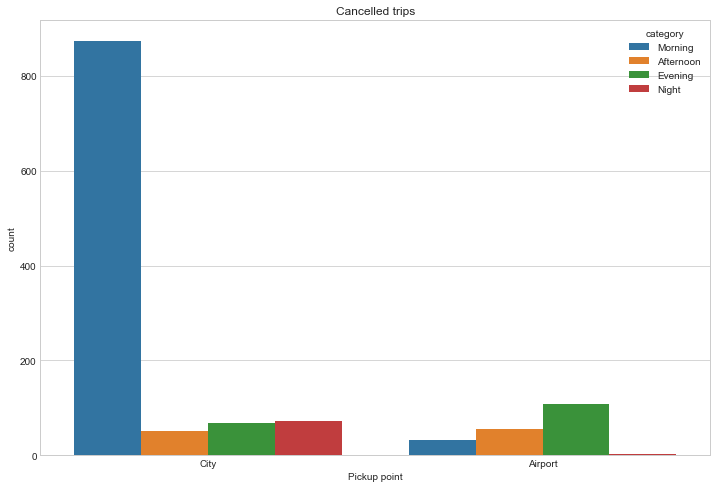

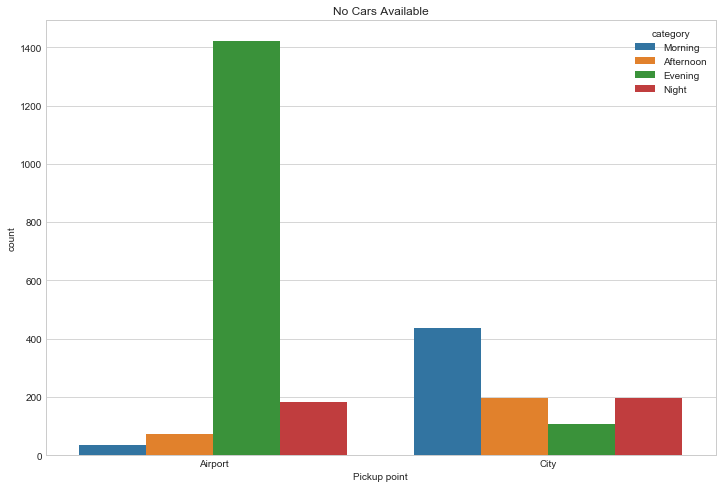

In [20]:
plt.figure(figsize=(12, 8))
plt.title('Cancelled trips')
sns.countplot(x='Pickup point', hue='category', data=df_canceled[df_canceled['Status'] == 'Cancelled'])
plt.show()
plt.figure(figsize=(12, 8))
plt.title('No Cars Available')
sns.countplot(x='Pickup point', hue='category', data=df_canceled[df_canceled['Status'] == 'No Cars Available'])
plt.show()

In [57]:
df_ds = df.loc[:, ['Pickup point', 'category', 'request_hour', 'Status']]
df_ds['total'] = 1
df_ds['completed'] = (df_ds['Status'] == 'Trip Completed')
df_ds = df_ds.groupby(['Pickup point', 'category', 'request_hour'], as_index=False).sum().dropna()
df_ds['completed_perc'] = round(df_ds['completed'] * 100 / df_ds['total'], 2)
df_ds

,Pickup point,category,request_hour,total,completed,completed_perc
5,Airport,Morning,5,92.0,85.0,92.39
6,Airport,Morning,6,89.0,81.0,91.01
7,Airport,Morning,7,83.0,75.0,90.36
8,Airport,Morning,8,73.0,67.0,91.78
9,Airport,Morning,9,89.0,74.0,83.15
10,Airport,Morning,10,75.0,53.0,70.67
35,Airport,Afternoon,11,64.0,49.0,76.56
36,Airport,Afternoon,12,87.0,63.0,72.41
37,Airport,Afternoon,13,65.0,35.0,53.85
38,Airport,Afternoon,14,50.0,37.0,74.00
